# Project Name: Predicting the Deaths which need Fundraising:Classification Technique

The Main aim of this project is to predict the Death which need Fundraising based on Various featrues.



# Required Libs.

In [1189]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Reading the Data

In [1190]:
data = pd.read_csv("Obituaries_Dataset.csv")

In [1191]:
display(data.head())
display(data.describe())
display(data.info())

Name Announcement       Death      Burial  \
0              Eng. Paul Chemweno    11/8/2017   11/2/2017  11/17/2017   
1            Edith Kiende Kiogora    11/8/2017  10/27/2017  11/11/2017   
2     Simon Muchiri Ngigii Mbaria    11/8/2017   11/1/2017   11/8/2017   
3  Mwalimu Erick Namusasi Werunga    11/8/2017  10/24/2017   11/9/2017   
4            Catherine Mueni Sina    11/8/2017   11/2/2017  11/11/2017   

  Burial_Day Burial_Week  Gender   Age Color    Size  ...  \
0     Friday     Weekday    Male  66.0   Yes   55.18  ...   
1   Saturday     Weekend  Female  43.0   Yes   83.60  ...   
2  Wednesday     Weekday    Male  35.0   Yes  109.12  ...   
3   Thursday     Weekday    Male  54.0   Yes   83.60  ...   
4   Saturday     Weekend  Female  41.0    No   55.18  ...   

                       Morgue  Same_Morgue  Cost_Morgue  Occupation  \
0                MTRH Eldoret           No          NaN    Director   
1  Chogoria Hospital Mortuary           No          NaN     Teacher   
2                Umash Nakuru           No          NaN     Teacher   
3              Maida Mortuary          NaN          NaN     Teacher   
4                         NaN          NaN          NaN         NaN   

  Repetition Corporate Corporate_Name Residence Residence_Name  \
0        NaN       NaN            NaN       NaN            NaN   
1        NaN       NaN            NaN       NaN            NaN   
2        NaN       NaN            NaN       NaN            NaN   
3        NaN       NaN            NaN       NaN            NaN   
4        NaN       NaN            NaN       NaN            NaN   

  Residence_Category  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 39 columns]

Age         Size  No_of_Children  Significant_Children  \
count  507.000000  1237.000000     1093.000000           1092.000000   
mean    65.422091    88.341496        5.484904              1.011905   
std     20.492632    55.520239        4.319116              1.848240   
min      1.000000    53.430000        0.000000              0.000000   
25%     51.000000    56.070000        3.000000              0.000000   
50%     68.000000    68.640000        4.000000              0.000000   
75%     81.500000   104.680000        8.000000              2.000000   
max    117.000000   880.000000       30.000000             12.000000   

       Significant_Relatives  
count            1083.000000  
mean                7.337950  
std                12.351233  
min                 0.000000  
25%                 0.000000  
50%                 2.000000  
75%                 8.000000  
max                79.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1291 non-null   object 
 1   Announcement           1265 non-null   object 
 2   Death                  893 non-null    object 
 3   Burial                 1164 non-null   object 
 4   Burial_Day             1163 non-null   object 
 5   Burial_Week            1163 non-null   object 
 6   Gender                 1291 non-null   object 
 7   Age                    507 non-null    float64
 8   Color                  1289 non-null   object 
 9   Size                   1237 non-null   float64
 10  Word_Count             1237 non-null   object 
 11  No_of_Children         1093 non-null   float64
 12  Significant_Children   1092 non-null   float64
 13  Significant_Relatives  1083 non-null   float64
 14  Fundraising            1142 non-null   object 
 15  Deat

None

# Converting Data Types

In [1192]:
data['Death']        = data['Death'].str.replace('20117','2017')
data['Death']        = data["Death"].replace({"11/3/20117":"11/3/2017","4/42017":"4/4/2017","31/4/2017":'3/31/2017',
                       "4/18/2917":"04/18/2017","12/2/0217":"12/2/2017","6/13/1996":"02/10/2017","4/18/2917":"4/18/2017"})

data['Announcement'] = data['Announcement'].str.replace('217-03-13','03/13/2017')
data['Announcement'] = data['Announcement'].str.replace("3/13/0217",'03/13/2017')
data["Announcement"] = data["Announcement"].replace({'`':'11/5/2017'})

data['Burial']       = data["Burial"].replace({"7/9/1905":"11/21/2017"})


* Replaced corruputed values in colums Death,Announcement,Burial in order to change datetype

In [1193]:
#-------------------------------------------------------------------
#Converting Death,Burial,Announcement variables into Datetime format
#--------------------------------------------------------------------

data[["Death","Burial","Announcement"]] = data[["Death","Burial","Announcement"]].apply(pd.to_datetime)


In [1194]:
data.drop(["Death_to_Announce","Death_to_Burial","Announce_to_Burial"],axis=1,inplace=True)

+ To change the "Death_to_Announce","Death_to_Burial","Announce_to_Burial" columns from category  type to numerical type, we need to create those columns again because of multiple data type values in those columns like data,string(having commas,dots),numerical

In [1195]:
Announce_to_B = data["Burial"] - data["Announcement"]
Announce_to_Burial = pd.DataFrame({"Announce_to_Burial":Announce_to_B.dt.components.days})

Death_to_B = data["Burial"] - data["Death"]
Death_to_Burial = pd.DataFrame({"Death_to_Burial":Death_to_B.dt.components.days})

Announce_to_D1 = data["Announcement"] - data["Death"]
Announce_to_Death = pd.DataFrame({"Death_to_Announce":Announce_to_D1.dt.components.days})

Times_data = pd.concat([Announce_to_Death,Announce_to_Burial,Death_to_Burial],axis=1)

* Created new columns "Death_to_Announce","Death_to_Burial","Announce_to_Burial" with help date columns and created a dataframe by those columns

In [1196]:
#--------------------------------------------------
# Conconcating the new variables to actual data
#---------------------------------------------------


data = pd.concat([data,Times_data],axis=1)

In [1197]:
#-----------------------------------------------------------
# converting unsupported values to covert data types
#-----------------------------------------------------------

data['Word_Count'] = data['Word_Count'].str.replace(',','')

data['No_of_Relatives'] = data['No_of_Relatives'].str.replace(',','')
data['No_of_Relatives'] = data['No_of_Relatives'].str.replace('-','')
data["No_of_Relatives"] = data["No_of_Relatives"].replace({'#VALUE!':np.nan})

data['Distance_Death'] = data['Distance_Death'].str.replace(',','')

data['Distance_Morgue'] = data['Distance_Morgue'].str.replace('o','0')

In order to convert data types of ['Word_Count','No_of_Relatives',Distance_Death'] from categorical data type to numerical,replaced unsupported type of values from those columns to supported

In [1198]:
#---------------------------------------------------
# Converting data types
#----------------------------------------------------
data[["Word_Count","No_of_Relatives","Distance_Death","Distance_Morgue"]] = data[["Word_Count","No_of_Relatives","Distance_Death","Distance_Morgue"]].apply(pd.to_numeric)

In [1199]:
#----------------------------------------------------------------
# Replacing categories which are duplicates in feature
#----------------------------------------------------------------
data["Color"] = data["Color"].replace({'yes':'Yes','no':'No'})
data["Cause_of_Death"] = data["Cause_of_Death"].replace({"ilness":"illness","accident":'Accident',"road accident":'Accident',"Illness":"illness"})
data["Married"] = data["Married"].replace({"yes":"Yes","no":"No"})
data["Burial_Day"] = data["Burial_Day"].replace({'saturday':'Saturday'})
data["Burial_Week"] = data["Burial_Week"].replace({"weekday":"Weekday","Weekeday":"Weekday","Weeekday":"Weekday","weekend":"Weekend"})


In [1200]:
#------------------------------------------------------------
# Droping the date variables bec we extracted info from them and deleting unique coloumn Name
#------------------------------------------------------------

data.drop(["Death","Burial","Announcement","Name"],axis=1,inplace= True)

In [1201]:
#--------------------------------------------------------------
# Deleting the records based on null values in Target Varibale
#--------------------------------------------------------------
index_names = data[ data['Fundraising'].isnull()].index
data.drop(index_names, inplace = True)

In [1202]:
data[["Death_to_Announce","Announce_to_Burial","Death_to_Burial"]].describe()

Death_to_Announce  Announce_to_Burial  Death_to_Burial
count         768.000000         1031.000000       743.000000
mean            0.674479            9.712900         8.495289
std           107.859478           68.820528       126.291771
min          -294.000000         -204.000000      -302.000000
25%             4.000000            2.000000         3.500000
50%             6.000000            3.000000         9.000000
75%            10.000000            5.000000        15.000000
max          1466.000000          241.000000      1471.000000

* As we know Time Duration between dates will not be in negative and range should not be greater than 30
  So we are imputing those values with median

In [1203]:
for feature in data[['Death_to_Announce','Announce_to_Burial','Death_to_Burial']]:
    
    for i in data[feature]:
        if i >=30:
            data[feature] = data[feature].replace({i:data[feature].median()}) 
        elif i <=0:
            data[feature] = data[feature].replace({i:data[feature].median()})
        else:
            data[feature].fillna(data[feature].median(),inplace=True)        
        

+ Replacing values which are less than 0 , grater than 30 and null values with median

# Exploring Data
* Finding relation between independent variables with target variable

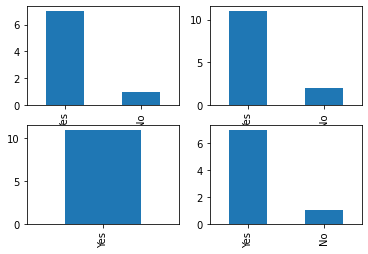

In [1204]:
plt.subplot(2,2,1)
data[data["Occupation"] == 'Reverend']["Fundraising"].value_counts().plot.bar()
plt.subplot(2,2,2)
data[data["Hospital"] =="Coptic Hospital"]["Fundraising"].value_counts().plot.bar()


plt.subplot(2,2,3)
data[data["Hospital"] =="Thika Hospital"]["Fundraising"].value_counts().plot.bar()
plt.subplot(2,2,4)
data[data["Occupation"] == 'Reverend']["Fundraising"].value_counts().plot.bar()
plt.show()



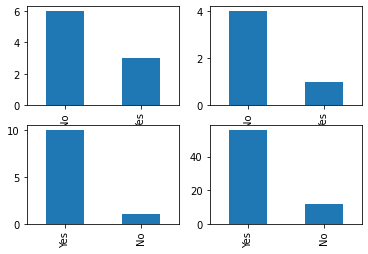

In [1205]:
plt.subplot(2,2,1)
data[data["Residence_Category"] == "Rural"]["Fundraising"].value_counts().plot.bar()
plt.subplot(2,2,2)
data[data["Residence_Category"] == "Middle"]["Fundraising"].value_counts().plot.bar()
plt.subplot(2,2,3)
data[data["Repetition"]=="Yes"]['Fundraising'].value_counts().plot.bar()
plt.subplot(2,2,4)
data[data["Same_Morgue"] == "Yes"]['Fundraising'].value_counts().plot.bar()

plt.show()

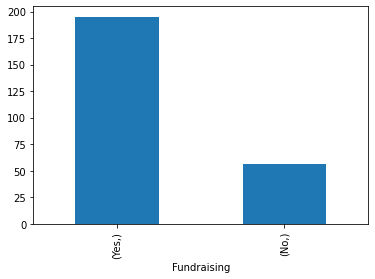

In [1206]:
# Here We Can Cleary say that people who are having same death and burial place are need funds
data[data["County_Death"]==data["County_Burial"]][['Fundraising']].value_counts().plot.bar()
plt.show()

<AxesSubplot:xlabel='Fundraising'>

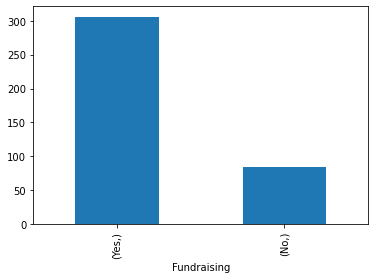

In [1207]:
data[data["County_Death"]==data["County_Morgue"]][['Fundraising']].value_counts().plot.bar()

In [1208]:
#----------------------------------------------------
# Finding all the categorical variables from the data
#-----------------------------------------------------
categorical_variables = [feature for feature in data.columns if data[feature].dtype == 'O']


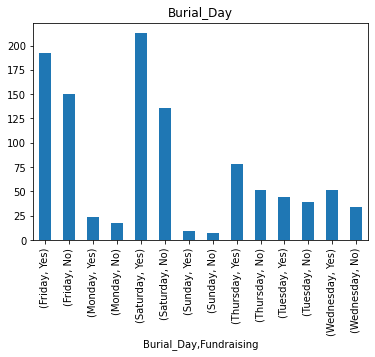

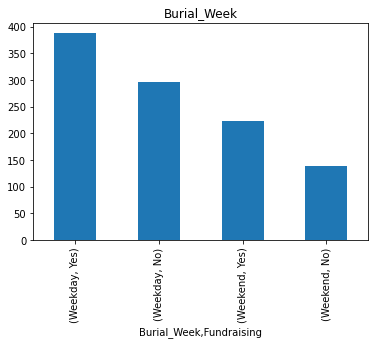

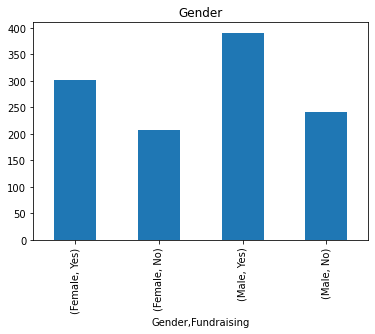

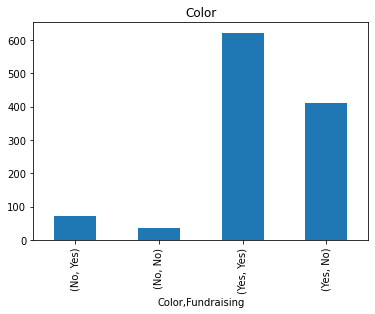

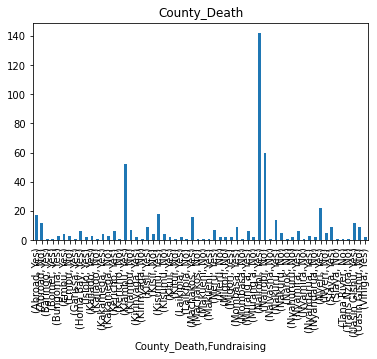

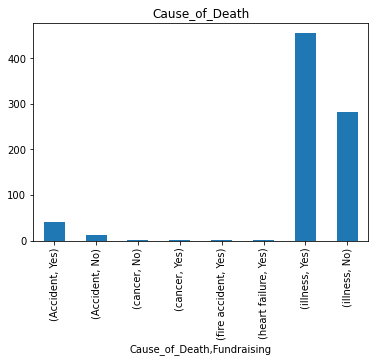

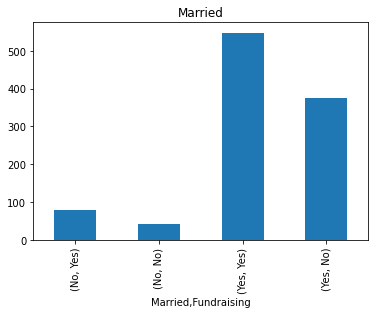

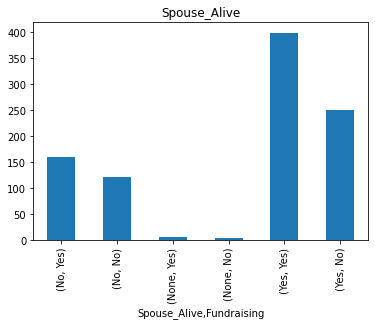

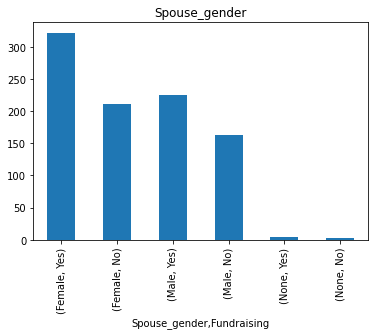

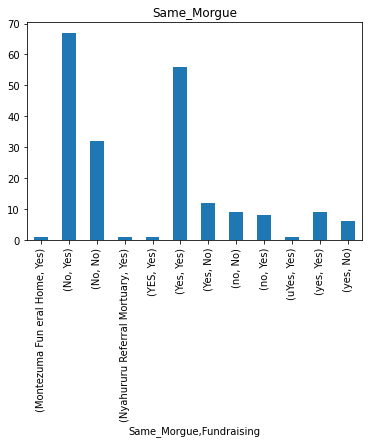

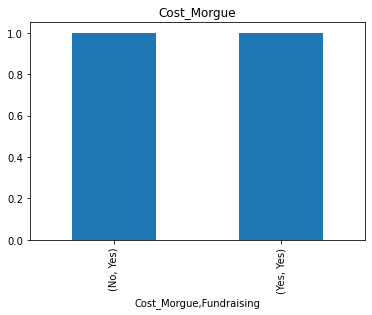

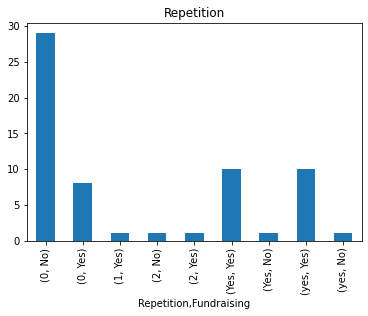

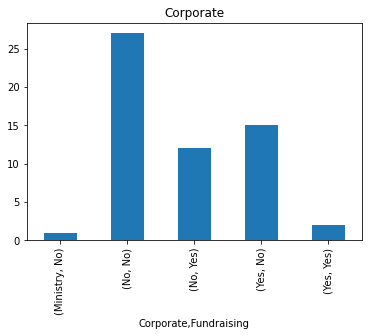

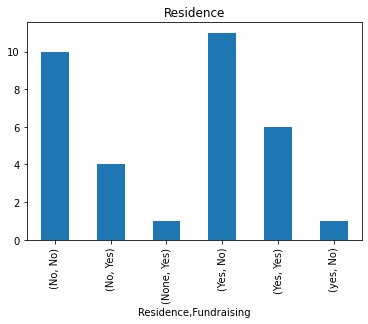

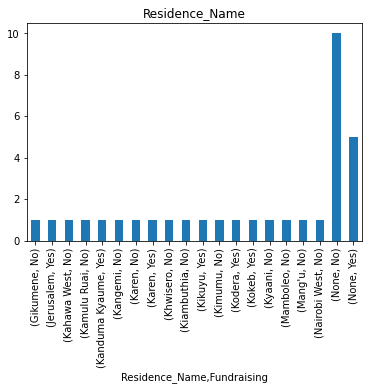

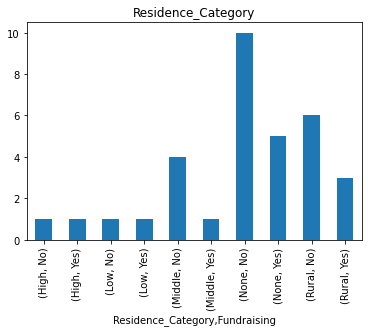

In [1209]:
#-------------------------------------------------------------------
# finding relation between categorical variables and target variable
#-------------------------------------------------------------------

for feature in categorical_variables:
    dataset = data.copy()
    
    if feature in ['Fundraising','County_Burial','County_Morgue','Hospital','Morgue','Occupation','Corporate_Name']:
        pass
    else:
        dataset.groupby(feature)['Fundraising'].value_counts().plot.bar()
        plt.title(feature)
        plt.show()

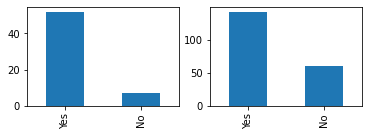

In [1210]:
plt.subplot(2,2,1)
data[data["County_Death"]== "Kiambu"]['Fundraising'].value_counts().plot.bar()
plt.subplot(2,2,2)
data[data["County_Death"]== "Nairobi"]['Fundraising'].value_counts().plot.bar()

plt.show()

 Whenever death is in Kiambu and Nairobi county need fund

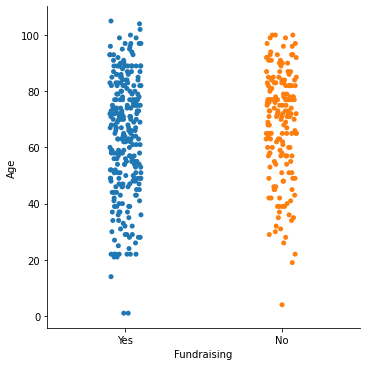

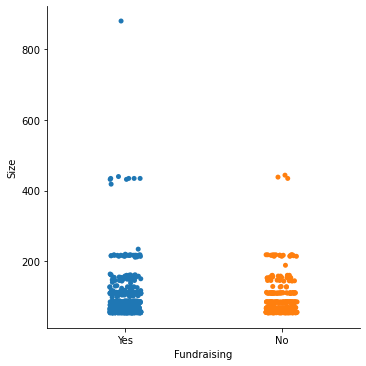

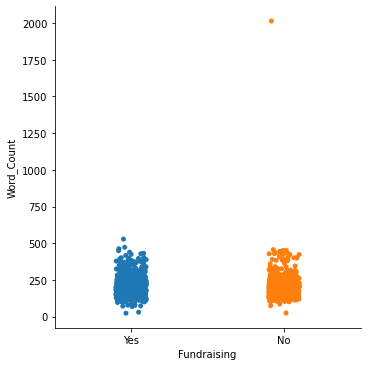

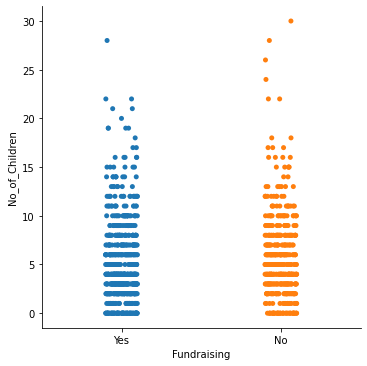

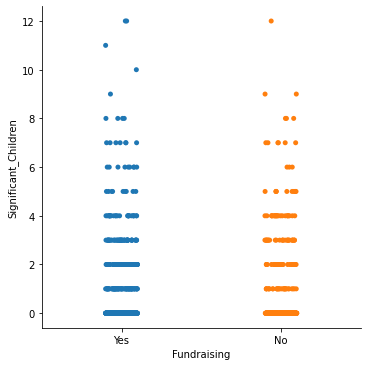

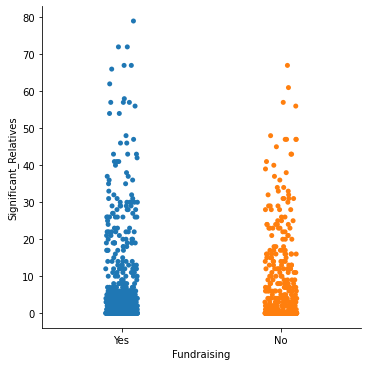

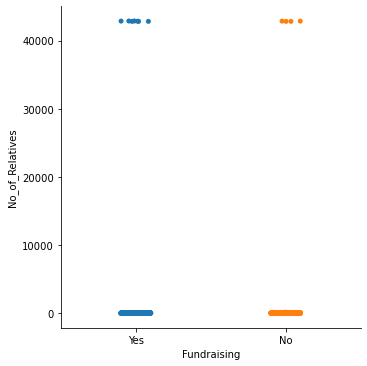

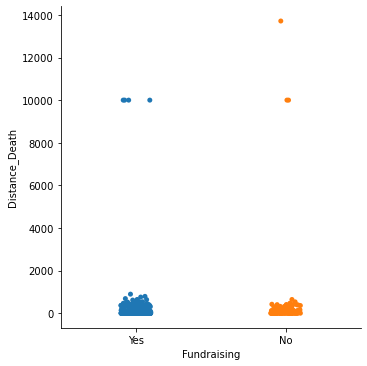

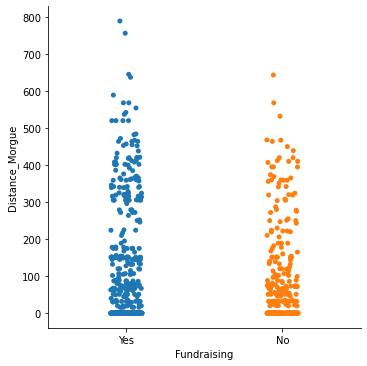

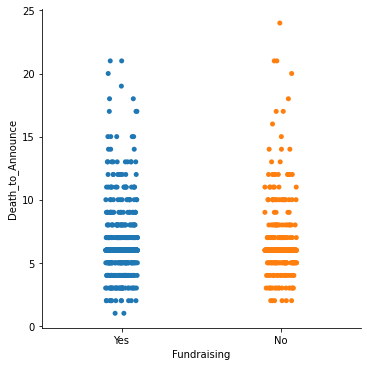

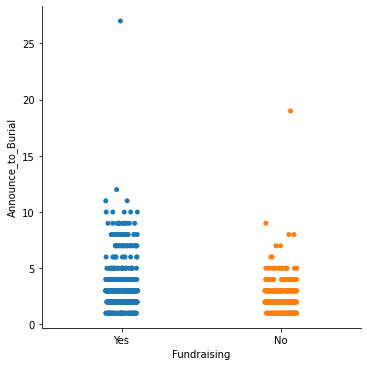

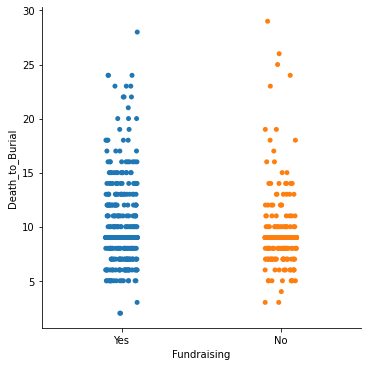

In [1211]:
for feature in numerical_variables:
    sns.catplot(x='Fundraising',y=feature,order=["Yes","No"],data=data)

## Imputing na values

In [1212]:
# Here We will check the Percentage of nan values present in each feature
## 1- step make the list of features which has missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]
## 2-step print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,"------>", np.round(data[feature].isnull().mean(),4),  ' % missing values')

Burial_Day ------> 0.0841  % missing values
Burial_Week ------> 0.0841  % missing values
Age ------> 0.6016  % missing values
Color ------> 0.0018  % missing values
No_of_Children ------> 0.0482  % missing values
Significant_Children ------> 0.0482  % missing values
Significant_Relatives ------> 0.0534  % missing values
No_of_Relatives ------> 0.0744  % missing values
County_Burial ------> 0.0919  % missing values
County_Death ------> 0.5447  % missing values
County_Morgue ------> 0.2294  % missing values
Distance_Death ------> 0.5762  % missing values
Distance_Morgue ------> 0.2373  % missing values
Cause_of_Death ------> 0.3021  % missing values
Married ------> 0.0884  % missing values
Spouse_Alive ------> 0.1786  % missing values
Spouse_gender ------> 0.1865  % missing values
Hospital ------> 0.7662  % missing values
Morgue ------> 0.2426  % missing values
Same_Morgue ------> 0.8222  % missing values
Cost_Morgue ------> 0.9982  % missing values
Occupation ------> 0.7802  % missing v

## Since they are many missing values, we need to find the relationship between missing values and Fundraising

 Let's plot some diagram to find relationship

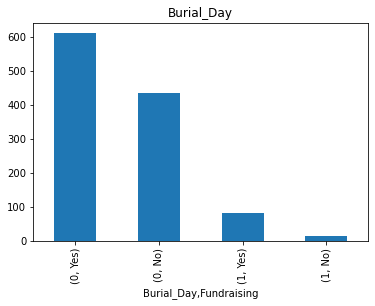

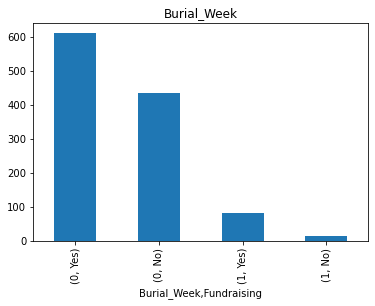

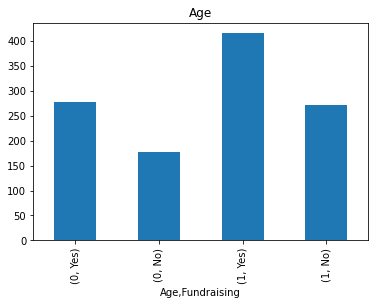

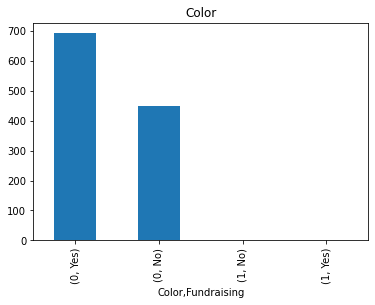

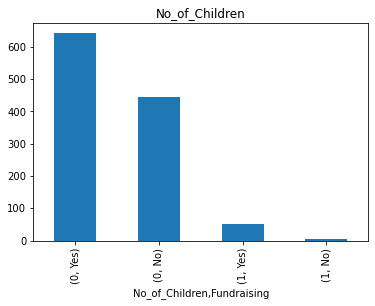

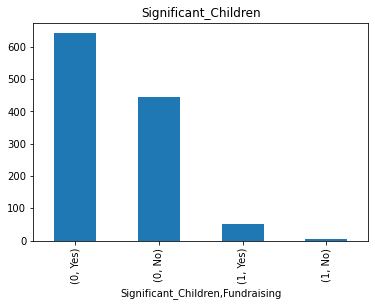

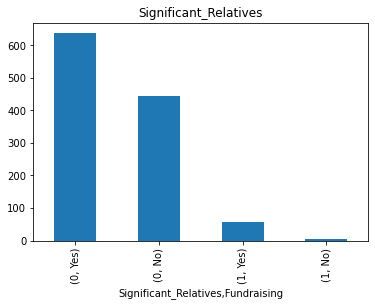

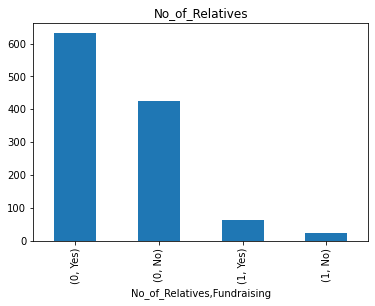

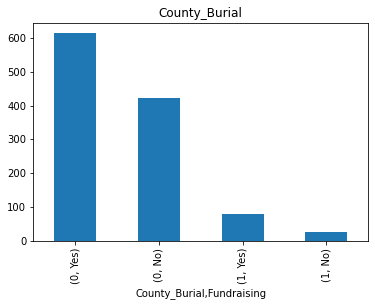

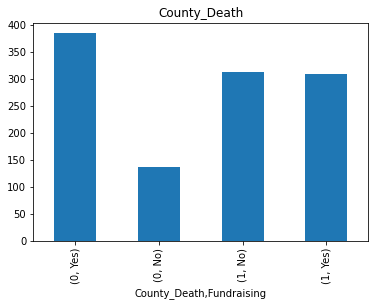

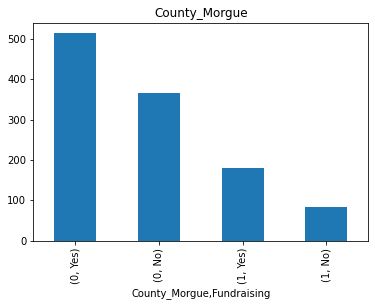

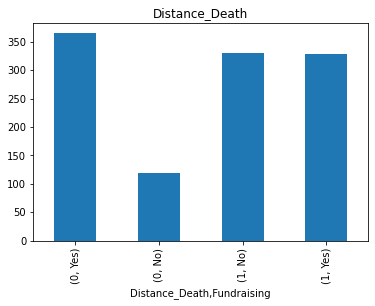

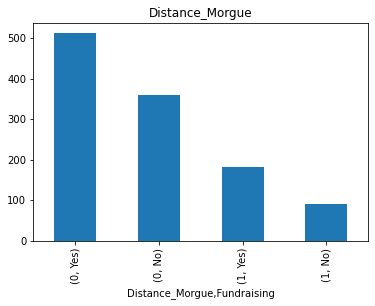

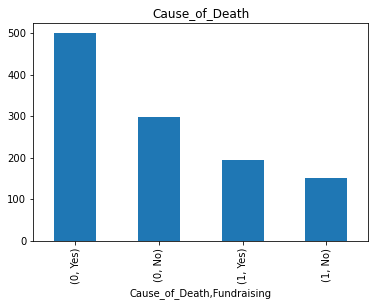

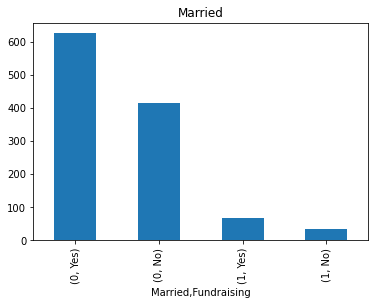

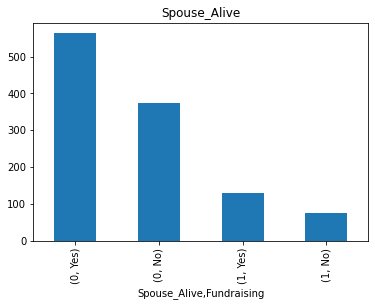

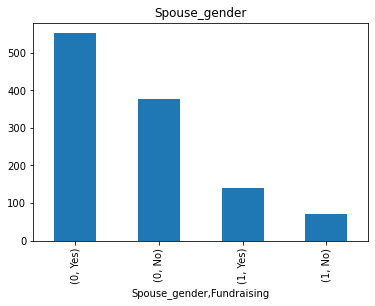

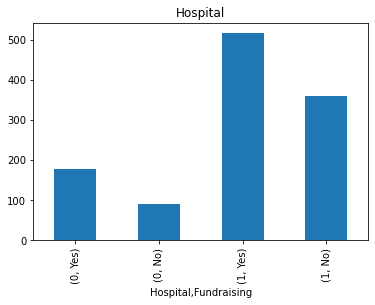

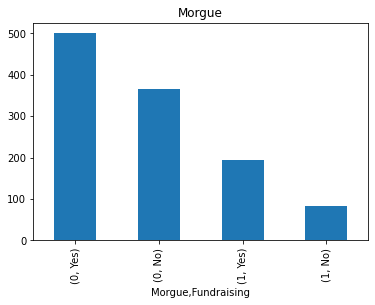

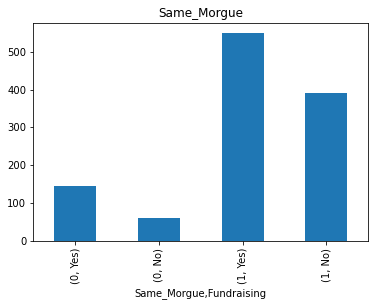

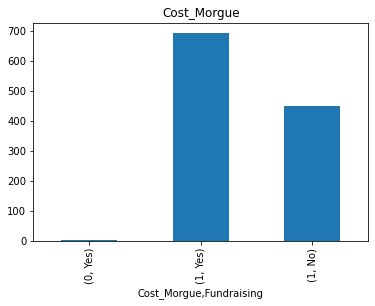

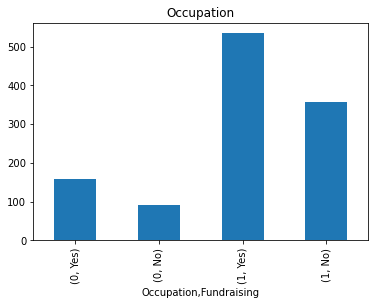

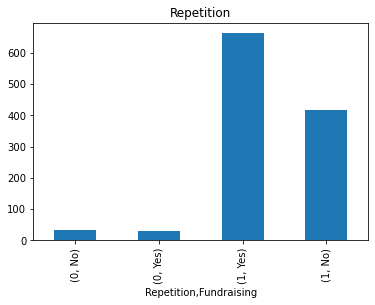

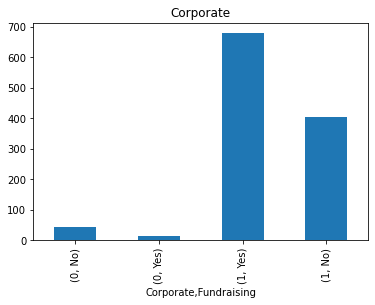

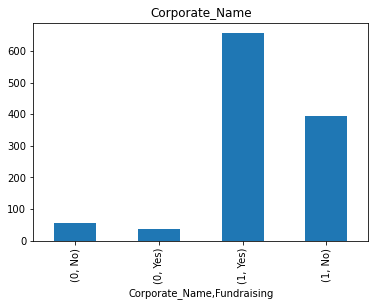

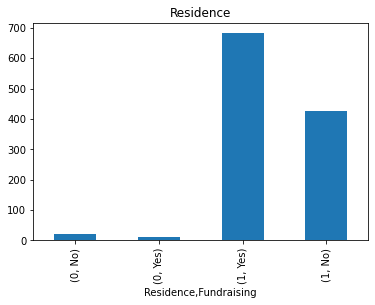

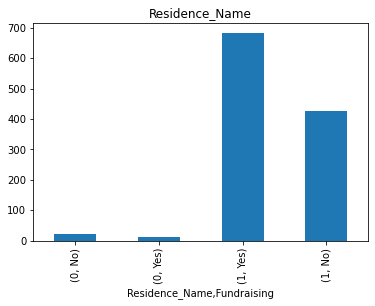

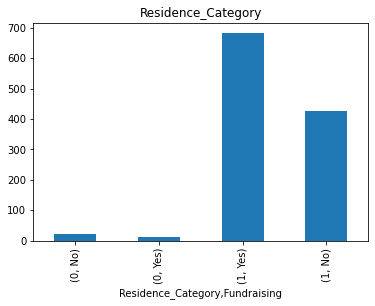

In [1213]:
for feature in features_with_na:
    data_na= data.copy()
    
    # Let's make a variable that indicates 1 of the observation was missing or zero otherwise
    data_na[feature] = np.where(data_na[feature].isnull(),1,0)
    
    # Let's calculate the mean 
    data_na.groupby(feature)['Fundraising'].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

 Since There is relationship between null values and target Variable

In [1214]:
features_cat_nan = [feature for feature in dataset.columns if data[feature].isnull().sum()>1 and data[feature].dtypes == "O"]

for feature in features_cat_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),2)))

Burial_Day: 0.08% missing values
Burial_Week: 0.08% missing values
Color: 0.0% missing values
County_Burial: 0.09% missing values
County_Death: 0.54% missing values
County_Morgue: 0.23% missing values
Cause_of_Death: 0.3% missing values
Married: 0.09% missing values
Spouse_Alive: 0.18% missing values
Spouse_gender: 0.19% missing values
Hospital: 0.77% missing values
Morgue: 0.24% missing values
Same_Morgue: 0.82% missing values
Cost_Morgue: 1.0% missing values
Occupation: 0.78% missing values
Repetition: 0.95% missing values
Corporate: 0.95% missing values
Corporate_Name: 0.92% missing values
Residence: 0.97% missing values
Residence_Name: 0.97% missing values
Residence_Category: 0.97% missing values


In [1215]:
for feature in features_cat_nan:
        data[feature+'var']  = np.where(data[feature].isnull(),1,0)
        

Created new features of categorical feature which are having null because not  loose the information from data

In [1216]:
#--------------------------------------------------------------------------------------------------
# creating a function to impute null values in categorical variable with new label called 'Missing'
#--------------------------------------------------------------------------------------------------

def impute_nan(df,variable):
    df[variable].fillna("Missing",inplace = True)

In [1217]:
#-----------------------------------------------------------------------------
# Imputing null values in categorical variable with new label called 'Missing'
#------------------------------------------------------------------------------

for feature in features_cat_nan:
    impute_nan(data,feature)

In [1218]:
data.head()

Burial_Day Burial_Week  Gender   Age Color    Size  Word_Count  \
0     Friday     Weekday    Male  66.0   Yes   55.18       179.0   
1   Saturday     Weekend  Female  43.0   Yes   83.60       293.0   
2  Wednesday     Weekday    Male  35.0   Yes  109.12       206.0   
3   Thursday     Weekday    Male  54.0   Yes   83.60       171.0   
5   Thursday     Weekday  Female  92.0   Yes   55.18       174.0   

   No_of_Children  Significant_Children  Significant_Relatives  ... Morguevar  \
0             7.0                   0.0                    0.0  ...         0   
1             4.0                   0.0                    7.0  ...         0   
2             4.0                   0.0                    2.0  ...         0   
3             4.0                   0.0                    0.0  ...         0   
5             4.0                   1.0                    7.0  ...         0   

   Same_Morguevar Cost_Morguevar Occupationvar Repetitionvar  Corporatevar  \
0               0              1             0             1             1   
1               0              1             0             1             1   
2               0              1             0             1             1   
3               1              1             0             1             1   
5               1              1             1             1             1   

   Corporate_Namevar Residencevar Residence_Namevar Residence_Categoryvar  
0                  1            1                 1                     1  
1                  1            1                 1                     1  
2                  1            1                 1                     1  
3                  1            1                 1                     1  
5                  1            1                 1                     1  

[5 rows x 56 columns]

In [1219]:
#------------------------------------------------------------------------------
# Finding all the numerical features
#------------------------------------------------------------------------------
# Printing the numerical features which are having null values with percentages
#------------------------------------------------------------------------------

features_num_nan = [feature for feature in dataset.columns if data[feature].isnull().sum()>1 and data[feature].dtypes != "O"]

for feature in features_num_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),2)))

Age: 0.6% missing values
No_of_Children: 0.05% missing values
Significant_Children: 0.05% missing values
Significant_Relatives: 0.05% missing values
No_of_Relatives: 0.07% missing values
Distance_Death: 0.58% missing values
Distance_Morgue: 0.24% missing values


In [1220]:
#-----------------------------------------------------------------------------------------------------
# Imputing the numerical missing values with median value of that columns
#------------------------------------------------------------------------------------------------------
# Creating new features which having null values in  numerical features because of not loose information
#--------------------------------------------------------------------------------------------------------

for feature in features_num_nan:
    median_value = data[feature].median()
    
    # Create a new feature to capture nan values # to get more information
    data[feature+'nan']  = np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[features_num_nan].isnull().sum()

Age                      0
No_of_Children           0
Significant_Children     0
Significant_Relatives    0
No_of_Relatives          0
Distance_Death           0
Distance_Morgue          0
dtype: int64

In [1221]:
data['Size'].fillna(data['Size'].median())

0        55.18
1        83.60
2       109.12
3        83.60
5        55.18
         ...  
1286    110.00
1287    130.24
1288    131.22
1289     54.56
1290     54.56
Name: Size, Length: 1142, dtype: float64

In [1222]:
data['Fundraising'] = data['Fundraising'].astype('category')
data['Fundraising_label'] = data['Fundraising'].cat.codes
Target = data["Fundraising_label"]
data.drop("Fundraising",axis=1,inplace=True)

 Converting Target variable(Fundraising) with  label encoding
 and Creating a new varible called Target and Droping the fundraising variable in data

In [1223]:
#----------------------------------------------------------
# Applying One Hot Encoding with all categorical variables
#----------------------------------------------------------
for col in data.dtypes[data.dtypes == 'object'].index:
    for_dummy = data.pop(col)
    data = pd.concat([data,pd.get_dummies(for_dummy,prefix=col)], axis = 1)
data.head()

Age    Size  Word_Count  No_of_Children  Significant_Children  \
0  66.0   55.18       179.0             7.0                   0.0   
1  43.0   83.60       293.0             4.0                   0.0   
2  35.0  109.12       206.0             4.0                   0.0   
3  54.0   83.60       171.0             4.0                   0.0   
5  92.0   55.18       174.0             4.0                   1.0   

   Significant_Relatives  No_of_Relatives  Distance_Death  Distance_Morgue  \
0                    0.0             35.0             0.0              0.0   
1                    7.0              8.0           224.0              0.0   
2                    2.0              7.0             0.0             77.0   
3                    0.0             33.0             0.0              0.0   
5                    7.0             19.0             0.0              0.0   

   Death_to_Announce  ...  Residence_Name_Mang'u  Residence_Name_Missing  \
0                6.0  ...                      0                       1   
1               12.0  ...                      0                       1   
2                7.0  ...                      0                       1   
3               15.0  ...                      0                       1   
5                6.0  ...                      0                       1   

   Residence_Name_Nairobi West  Residence_Name_None  Residence_Category_High  \
0                            0                    0                        0   
1                            0                    0                        0   
2                            0                    0                        0   
3                            0                    0                        0   
5                            0                    0                        0   

   Residence_Category_Low  Residence_Category_Middle  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
5                       0                          0   

   Residence_Category_Missing  Residence_Category_None  \
0                           1                        0   
1                           1                        0   
2                           1                        0   
3                           1                        0   
5                           1                        0   

   Residence_Category_Rural  
0                         0  
1                         0  
2                         0  
3                         0  
5                         0  

[5 rows x 894 columns]

In [1224]:
#-------------------------------------------------------------
# Spliting Train and Test
#-------------------------------------------------------------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,Target,test_size=0.25)

# Building Model

In [1230]:
#-------------------------------------------------
# Building Random Forest algorithm
#-------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

model = rf.fit(x_train,y_train)


In [ ]:
x_train["Size"] = x_train.fillna(x_train['Size'].median())

In [1231]:
#------------------------------------
# Predicting on train data
#------------------------------------

train_pred = model.predict(x_train)
#-----------------------------------
#Predicting on Test Data
#----------------------------------- 

y_pred = model.predict(x_test)

### Model Evaluation

##### Confusion Matrix, f1 score, recall, sensitivity

In [1232]:
#----------------------------------------------------
# Confusion matrix for both train and test predictions
#-----------------------------------------------------

from sklearn.metrics import confusion_matrix


print("Confusion Matrix for Train_Data")
print(confusion_matrix(y_train,train_pred))
print('\n')

print("Confusion Matrix for Test_Data")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix for Train_Data
[[337   0]
 [  0 519]]


Confusion Matrix for Test_Data
[[106   6]
 [  2 172]]


In [1233]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.97      0.99      0.98       174

    accuracy                           0.97       286
   macro avg       0.97      0.97      0.97       286
weighted avg       0.97      0.97      0.97       286



In [1234]:
from sklearn.metrics import roc_curve,auc

false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.967467159277504

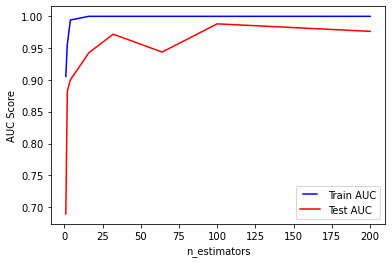

In [1235]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results  = []


for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator,n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,"b",label = 'Train AUC')
line2, = plt.plot(n_estimators, test_results, "r",label = "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()
